### Load Libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from datetime import timedelta
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

### Load Data

In [2]:
df = pd.read_csv('nyc_taxi_trip_duration.csv')

### File structure and content

In [3]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [4]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   pickup_datetime     729322 non-null  object 
 3   dropoff_datetime    729322 non-null  object 
 4   passenger_count     729322 non-null  int64  
 5   pickup_longitude    729322 non-null  float64
 6   pickup_latitude     729322 non-null  float64
 7   dropoff_longitude   729322 non-null  float64
 8   dropoff_latitude    729322 non-null  float64
 9   store_and_fwd_flag  729322 non-null  object 
 10  trip_duration       729322 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB


In [6]:
print('We have {} rows.'.format(df.shape[0]))
print('We have {} columns'.format(df.shape[1]))
df.iloc[1,:]

We have 729322 rows.
We have 11 columns


id                              id0889885
vendor_id                               1
pickup_datetime       2016-03-11 23:35:37
dropoff_datetime      2016-03-11 23:53:57
passenger_count                         2
pickup_longitude               -73.988312
pickup_latitude                 40.731743
dropoff_longitude              -73.994751
dropoff_latitude                40.694931
store_and_fwd_flag                      N
trip_duration                        1100
Name: 1, dtype: object

### Reformatting features 

In [7]:
# converting strings to datetime features
df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime)
df['dropoff_datetime'] = pd.to_datetime(df.dropoff_datetime)

In [8]:
# extracting day of week and hour of day for trips
df['day_of_week'] = df['pickup_datetime'].dt.weekday
df['hour_of_day'] = df['pickup_datetime'].dt.hour

In [9]:
# Removing features not to be used in modeling
df = df.drop(['pickup_datetime', 'dropoff_datetime','store_and_fwd_flag','pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude','id'],axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   vendor_id        729322 non-null  int64
 1   passenger_count  729322 non-null  int64
 2   trip_duration    729322 non-null  int64
 3   day_of_week      729322 non-null  int64
 4   hour_of_day      729322 non-null  int64
dtypes: int64(5)
memory usage: 27.8 MB


### Missing Values

In [11]:
np.sum(pd.isnull(df))

vendor_id          0
passenger_count    0
trip_duration      0
day_of_week        0
hour_of_day        0
dtype: int64

### Making Copy of Data

In [12]:
data = df.copy()

## Evaluation Metrics

We will be using adjusted R-squared as a metric for evaluation of our models. 

The adjusted R-squared metric is a modified version of the R-squared metric used to evaluate regression models. While the R-squared metric tells us the proportion of the variation in the dependent variable explained by the independent variables, the adjusted R-squared metric takes into account the number of independent variables used in the model.

Here are some benefits of using the adjusted R-squared metric:

    1.It provides a more accurate evaluation of the goodness of fit of a regression model than the R-squared metric.
        
    2.It helps to avoid overfitting, which occurs when a model fits the training data too closely and may not perform well on new data.
        
    3.It takes into account the number of independent variables in the model, providing a more fair evaluation of the model's performance.
    
    4.It can be used to compare different models with different numbers of independent variables, as the adjusted R-squared metric adjusts for the number of independent variables used.
    
Overall, the adjusted R-squared metric is a useful tool for evaluating the performance of regression models and making informed decisions about which models to use.

# Regression Benchmark 

### Shuffling and Creating Train and Test Set


In [13]:
from sklearn.utils import shuffle

# Shuffling the Dataset
data = shuffle(data, random_state = 42)

from sklearn.model_selection import train_test_split

# Split data into training and test sets
train, test = train_test_split(data, test_size=0.2, random_state=42)


In [19]:
train.head()

,vendor_id,passenger_count,trip_duration,day_of_week,hour_of_day
136414,1,1,303,2,14
708966,1,1,962,6,13
26900,1,1,300,1,14
680138,2,6,1629,0,6
287486,2,3,656,6,14


In [20]:
test.head()

,vendor_id,passenger_count,trip_duration,day_of_week,hour_of_day
247177,2,1,1514,6,16
41189,1,1,1332,0,11
441690,1,1,1840,5,13
246922,2,2,1027,4,17
202073,1,2,295,5,21


## Simple Mean ( mean of trip_duration)


In [21]:
# storing simple mean in a new column in the test set as "simple_mean"
test['simple_mean'] = train['trip_duration'].mean()

In [22]:
test.head()

,vendor_id,passenger_count,trip_duration,day_of_week,hour_of_day,simple_mean
247177,2,1,1514,6,16,956.041033
41189,1,1,1332,0,11,956.041033
441690,1,1,1840,5,13,956.041033
246922,2,2,1027,4,17,956.041033
202073,1,2,295,5,21,956.041033


In [25]:
import sklearn.metrics as metrics

# Calculate the R-squared value
r2 = metrics.r2_score(test['trip_duration'],test['simple_mean'])

# Calculate the number of data points in the training data
num_data_points = len(test['trip_duration'])

# Calculate the number of predictors (assuming you have a constant term)
num_predictors = 1

# Calculate the adjusted R-squared value
adjusted_r2 = 1 - ((1 - r2) * (num_data_points - 1)) / (num_data_points - num_predictors - 1)

print("Adjusted R-squared:", adjusted_r2)


Adjusted R-squared: -4.835295428518016e-05


This indicates that model has not predictive value

In [29]:
train.columns

Index(['vendor_id', 'passenger_count', 'trip_duration', 'day_of_week',
       'hour_of_day'],
      dtype='object')

### Considering all the features

In [30]:
combo = pd.pivot_table(train, values = 'trip_duration', index = ['hour_of_day','day_of_week','passenger_count','vendor_id'], aggfunc = np.mean)
combo

trip_duration
hour_of_day day_of_week passenger_count vendor_id               
0           0           0               1              45.000000
                                        2               1.000000
                        1               1             709.308715
                                        2            1164.410256
                        2               1             782.127517
...                                                          ...
23          6           4               1             870.684211
                                        2             707.090909
                        5               1             304.000000
                                        2             748.007874
                        6               2             672.805195

[1837 rows x 1 columns]

In [31]:
# Initiating new empty column
test['Super_mean'] = 0

# Assigning variables to strings ( to shorten code length)
s4 = 'hour_of_day'
s3 = 'day_of_week'
s2 = 'passenger_count'
s1 = 'vendor_id'

# For every Unique Value in s1
for i in test[s1].unique():
  # For every Unique Value in s2
  for j in test[s2].unique():
        # For every Unique Value in s3
        for k in test[s3].unique():
            # For every Unique Value in s4
            for l in test[s4].unique():
                # Calculate and Assign mean to new column, corresponding to both unique values of s1, s2, s3, s4 and s5 simultaneously
                test['Super_mean'][(test[s1] == i) & (test[s2]==j) & (test[s3]==k) & (test[s4]==l)] = train['trip_duration'][(train[s1] == i) & (train[s2]==j) & (train[s3]==k) & (train[s4]==l)].mean()

Replacing all the null values of Super mean by its mean value

In [40]:
test['Super_mean'] = test['Super_mean'].fillna(test['Super_mean'].mean())

In [41]:
#calculate r-squared
r2 = metrics.r2_score(test['trip_duration'],test['Super_mean'])
N=test['trip_duration'].shape[0]
p=4
x = (1-r2)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

Adjusted-R2 :  -0.002199790747377417


In [45]:
alfa = adj_rsquared

# K-Nearest neighbours's model

In [46]:
data.describe()

,vendor_id,passenger_count,trip_duration,day_of_week,hour_of_day
count,729322.000000,729322.000000,7.293220e+05,729322.000000,729322.000000
mean,1.535403,1.662055,9.522291e+02,3.049081,13.611698
std,0.498745,1.312446,3.864626e+03,1.954470,6.402853
min,1.000000,0.000000,1.000000e+00,0.000000,0.000000
25%,1.000000,1.000000,3.970000e+02,1.000000,9.000000
50%,2.000000,1.000000,6.630000e+02,3.000000,14.000000
75%,2.000000,2.000000,1.075000e+03,5.000000,19.000000
max,2.000000,9.000000,1.939736e+06,6.000000,23.000000


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 729322 entries, 469114 to 121958
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   vendor_id        729322 non-null  int64
 1   passenger_count  729322 non-null  int64
 2   trip_duration    729322 non-null  int64
 3   day_of_week      729322 non-null  int64
 4   hour_of_day      729322 non-null  int64
dtypes: int64(5)
memory usage: 33.4 MB


Here we need to convert the vendor_id into dummy variables

### Creating Dummy Variables

In [48]:
dummy_vendor = pd.get_dummies(data['vendor_id'])
data[1] = dummy_vendor[1]
data[2] = dummy_vendor[2]
data = data.drop('vendor_id',axis=1)

In [49]:
data.head()

,passenger_count,trip_duration,day_of_week,hour_of_day,1,2
469114,1,657,5,10,0,1
694852,5,195,4,18,0,1
696324,1,840,6,0,1,0
356496,1,398,5,10,1,0
645318,3,682,6,10,1,0


### Seperating independent and independent variables

In [50]:
#seperating independent and dependent variables
x = data.drop(['trip_duration'], axis=1)
y = data['trip_duration']
x.shape, y.shape

((729322, 5), (729322,))

### Scaling the data (Using MinMax Scaler)

In [51]:
# Importing MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [52]:
x = pd.DataFrame(x_scaled,columns=x.columns)

In [53]:
x.head()

,passenger_count,day_of_week,hour_of_day,1,2
0,0.111111,0.833333,0.434783,0.0,1.0
1,0.555556,0.666667,0.782609,0.0,1.0
2,0.111111,1.000000,0.000000,1.0,0.0
3,0.111111,0.833333,0.434783,1.0,0.0
4,0.333333,1.000000,0.434783,1.0,0.0


In [54]:
# Importing Train test split
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

### Implementing KNN Regressor

In [55]:
#importing KNN regressor and metric mse

from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse

### Elbow for Classifier

In [56]:
def Elbow(K):
  #initiating empty list
    test_mse = []
  
  #training model for evey value of K
    for i in K:
        #Instance of KNN
        reg = KNN(n_neighbors = i)
        reg.fit(train_x, train_y)
        #Appending mse value to empty list claculated using the predictions
        tmp = reg.predict(test_x)
        tmp = mse(tmp,test_y)
        test_mse.append(tmp)
    
    return test_mse

Text(0.5, 1.0, 'Elbow Curve for test')

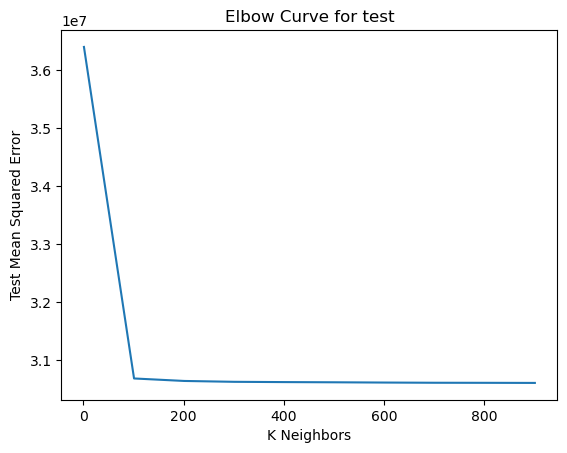

In [39]:
k = range(1,1000,100)

# calling above defined function
test = Elbow(k)

# plotting the Curves
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test Mean Squared Error')
plt.title('Elbow Curve for test')

Thus, Test MSE appears to be minimum around 100 value of k

In [57]:
# Creating instance of KNN
reg = KNN(n_neighbors = 100)

# Fitting the model
reg.fit(train_x, train_y)

# Predicting over the Train Set
test_predict = reg.predict(test_x)

In [58]:
#calculate r-squared
r2 = metrics.r2_score(test_y,test_predict)
N=test_y.shape[0]
p=4
x = (1-r2)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)


Adjusted-R2 :  -0.002292104869636047


In [59]:
beta = adj_rsquared

# Decision Tree

In [60]:
# Import required libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



# Create decision tree regressor object
dt_regressor = DecisionTreeRegressor(max_depth=5, min_samples_split=10, random_state=42)

# Train the model on the training data
dt_regressor.fit(train_x, train_y)

# Make predictions on the test data
y_pred = dt_regressor.predict(test_x)



In [61]:
#calculate r-squared
r2 = metrics.r2_score(test_y,y_pred)
N=test_y.shape[0]
p=4
x = (1-r2)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

Adjusted-R2 :  0.0005215451482346589


In [62]:
gamma = adj_rsquared

# Linear Regression

### Implementing Linear Regression

In [63]:
#importing Linear Regression and metric mean square error
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as MAE

In [64]:
# Creating instance of Linear Regresssion
lr = LR()

# Fitting the model
lr.fit(train_x, train_y)

LinearRegression()

In [66]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
mae = MAE(train_predict, train_y)

r2 = 1 - (mae / np.var(test_y))
n = len(test_y)
k = 4

# Calculate adjusted r-squared
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print('Adjusted R-squared:', adj_r2)


Adjusted R-squared: 0.9999797612319562


In [49]:
lr.coef_

array([ 1.74192405e+02, -1.66028102e+01,  4.37217514e+01, -6.34229377e+13,
       -6.34229377e+13])

### Plotting the coefficients

Text(0.5, 1.0, 'Coefficient plot')

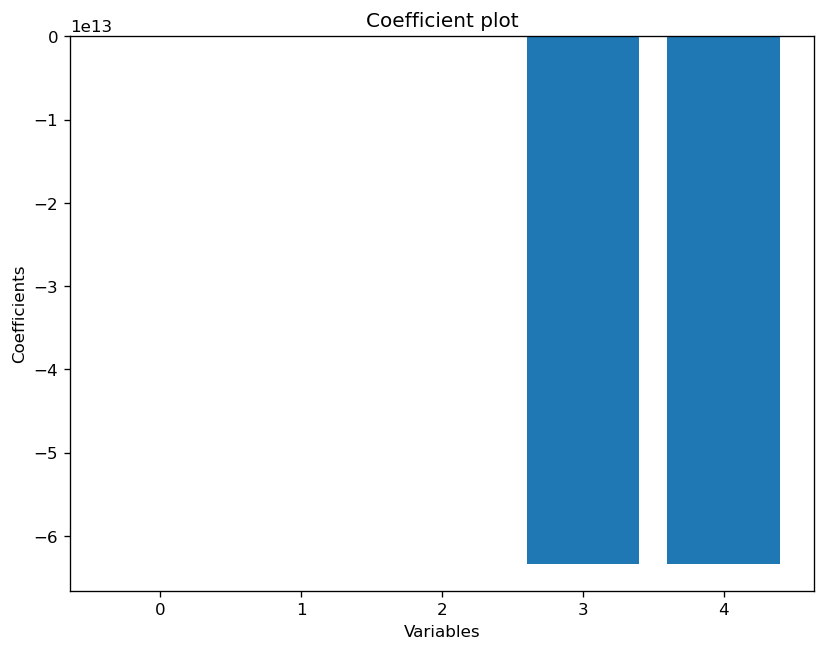

In [67]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

Here we can see that model is dependent highly on vendor

## Checking assumptions of Linear Model

In [68]:
# Arranging and calculating the Residuals
residuals = pd.DataFrame({
    'fitted values' : test_y,
    'predicted values' : test_predict,
})

residuals['residuals'] = residuals['fitted values'] - residuals['predicted values']
residuals.head()

,fitted values,predicted values,residuals
711017,1707,1599.06,107.94
90179,1225,786.61,438.39
191653,676,1516.01,-840.01
3951,494,515.56,-21.56
4259,746,938.19,-192.19


### Checking Distribution of Residuals

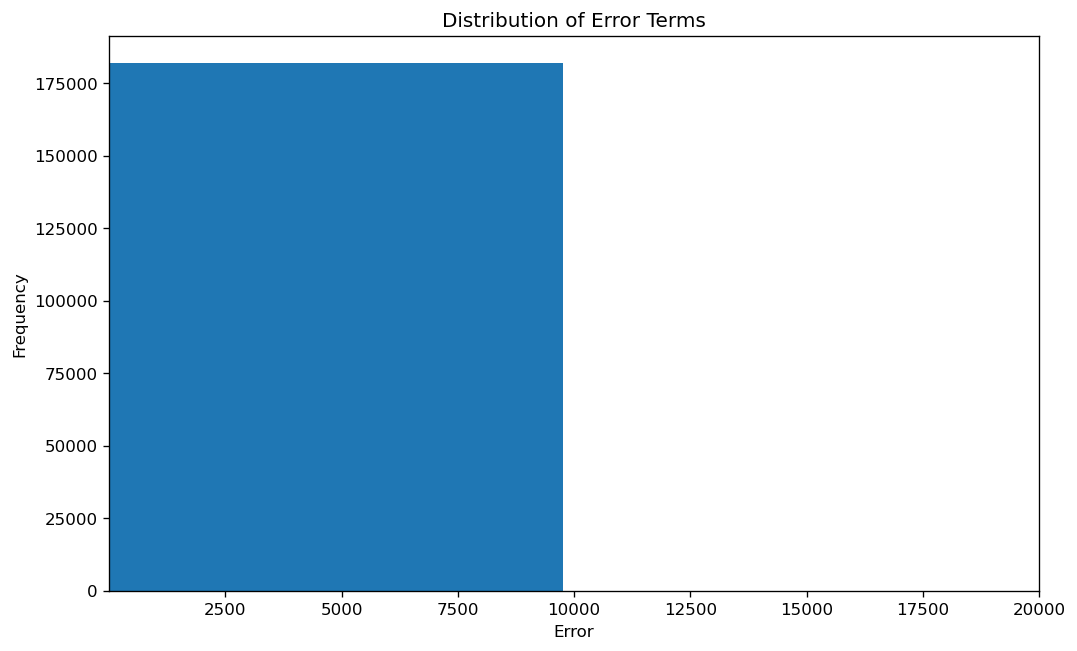

In [79]:
# Histogram for distribution
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
plt.hist(residuals.residuals, bins = 150)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Error Terms')
plt.xlim(1,20000)
plt.show()

According to the Histogram, the distribution of error is nearly normal and concentrated between 0 abd 10000, but there are some outliers on the Higher end of the errors.

### QQ-Plot (Is the data Normally Distributed?)

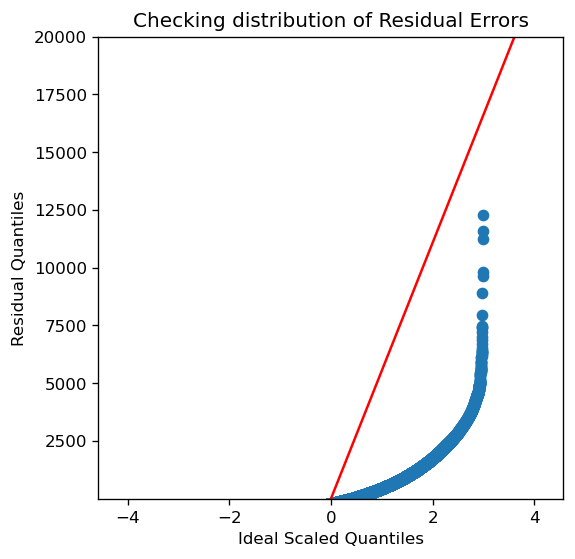

In [78]:
# importing the QQ-plot from the from the statsmodels
from statsmodels.graphics.gofplots import qqplot

## Plotting the QQ plot
fig, ax = plt.subplots(figsize=(5,5) , dpi = 120)
qqplot(residuals.residuals, line = 's' , ax = ax)
plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking distribution of Residual Errors')
plt.ylim(1,20000)
plt.show()

## Model Interpretability

So far we have simply been predicting the values using the linear regression, But in order to Interpret the model, the normalising of the data is essential.

In [80]:
# Creating instance of Linear Regresssion
lr = LR(normalize = True)

# Fitting the model
lr.fit(train_x, train_y)

LinearRegression(normalize=True)

In [81]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
k = MAE(train_predict, train_y)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 619.7420863500267


In [82]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = MAE(test_predict, test_y)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     631.9401754227202


Text(0.5, 1.0, 'Normalized Coefficient plot')

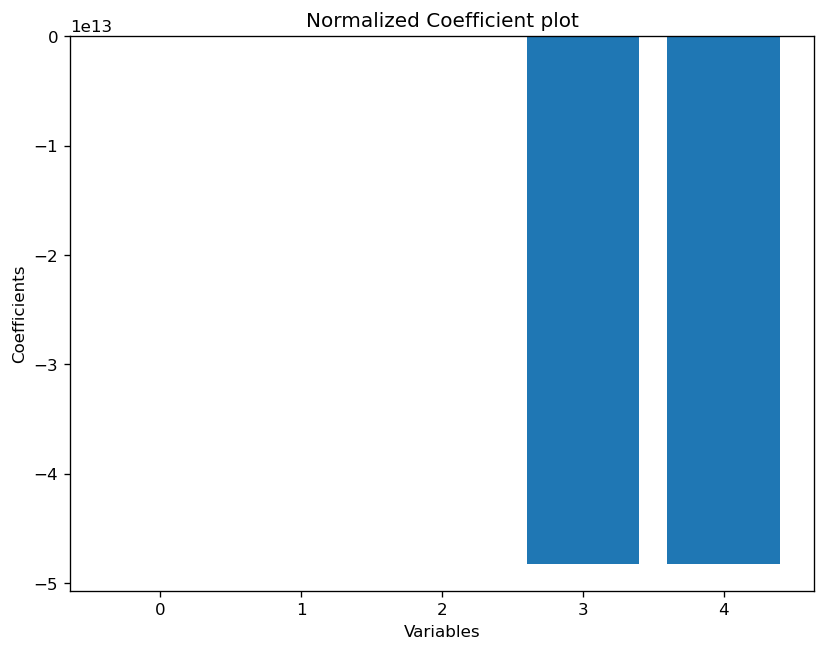

In [83]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Normalized Coefficient plot')

#### Creating new subsets of data

In [84]:
#seperating independent and dependent variables
x = data.drop(['trip_duration'], axis=1)
y = data['trip_duration']
x.shape, y.shape

((729322, 5), (729322,))

In [85]:
# Arranging coefficients with features

Coefficients = pd.DataFrame({
    'Variable'    : x.columns,
    'coefficient' : lr.coef_
})
Coefficients.head()

,Variable,coefficient
0,passenger_count,1.759472e+02
1,day_of_week,-1.661744e+01
2,hour_of_day,4.370704e+01
3,1,-4.829389e+13
4,2,-4.829389e+13


#### Chossing variables with sigificance greater than 0.5 ( Filtering Significant Features)

In [86]:
sig_var = Coefficients[Coefficients.coefficient > 0.5]

#### Extracting the significant subset do independent Variables

In [87]:
subset = data[sig_var['Variable'].values]
subset.head()

,passenger_count,hour_of_day
469114,1,10
694852,5,18
696324,1,0
356496,1,10
645318,3,10


#### Splitting the data into train set and the test set

In [88]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(subset, y , random_state = 56)

#### Implementing Linear Regression

In [89]:
#importing Linear Regression and metric mean square error
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

#### Training Model

In [90]:
# Creating instance of Linear Regresssion with Normalised Data
lr = LR(normalize = True)

# Fitting the model
lr.fit(train_x, train_y)

LinearRegression(normalize=True)

#### Predicting over the train set

In [95]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(test_x)

In [97]:
#calculate r-squared
r2 = metrics.r2_score(test_y,train_predict)
N=test_y.shape[0]
p=4
x = (1-r2)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

Adjusted-R2 :  1.0377947085804529e-05


In [98]:
delta = adj_rsquared

In [99]:
alfa, beta, gamma, delta

(-0.002199790747377417,
 -0.002292104869636047,
 0.0005215451482346589,
 1.0377947085804529e-05)

# Plottting Adjusted R-squared values for different variables

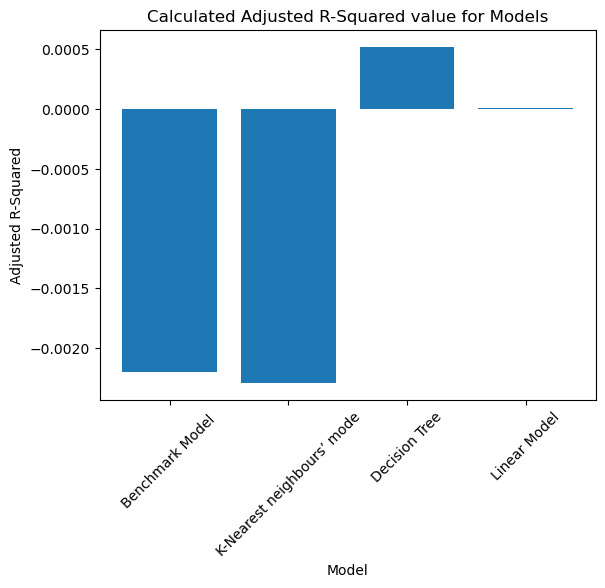

In [101]:
import matplotlib.pyplot as plt

# Define the data
values = [alfa, beta, gamma, delta]
labels = ['Benchmark Model ', 'K-Nearest neighbours’ mode', 'Decision Tree', 'Linear Model']

# Create a bar chart
fig, ax = plt.subplots()
ax.bar(labels, values)

# Add labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Adjusted R-Squared')
ax.set_title('Calculated Adjusted R-Squared value for Models')
plt.xticks(rotation=45)

# Display the chart
plt.show()



Take Adjusted R-Squared as the evaluation metric, we can draw following conclusions:
- Benchmark Model and K-Nearest Neighbour has no predicitive value and fit worse than a horizontal line. 
- Predictive value of Linear Model is very less. 
- Best predictions are made by Decision Tree Model.